In [6]:
def nat_read_xlsx(xrow,xcol1,xcol2):
    import xlrd
    file = 'One_box_model_Lan_C165.xlsx'
    wb=xlrd.open_workbook(file)
    sheet=wb.sheet_by_index(0)
    data=[]
    for i in range (xcol1,xcol2):
        data.append(sheet.cell_value(xrow,i))
    return data

In [7]:
year=nat_read_xlsx(0,4,37)
qdata=nat_read_xlsx(20,4,37)
ch4f_data_unconverted=nat_read_xlsx(2,4,37)

In [8]:
unconverted_burden=nat_read_xlsx(1,4,37)

In [11]:
converted_burden=[i*2.843217121 for i in unconverted_burden]
burden=[round(i) for i in converted_burden]
ch4f_data_float=[i*2.843217121 for i in ch4f_data_unconverted]
ch4f_data=[round(i) for i in ch4f_data_float]

In [12]:
import numpy 
import math

In [13]:
from matplotlib import pyplot, axes 
from scipy import stats

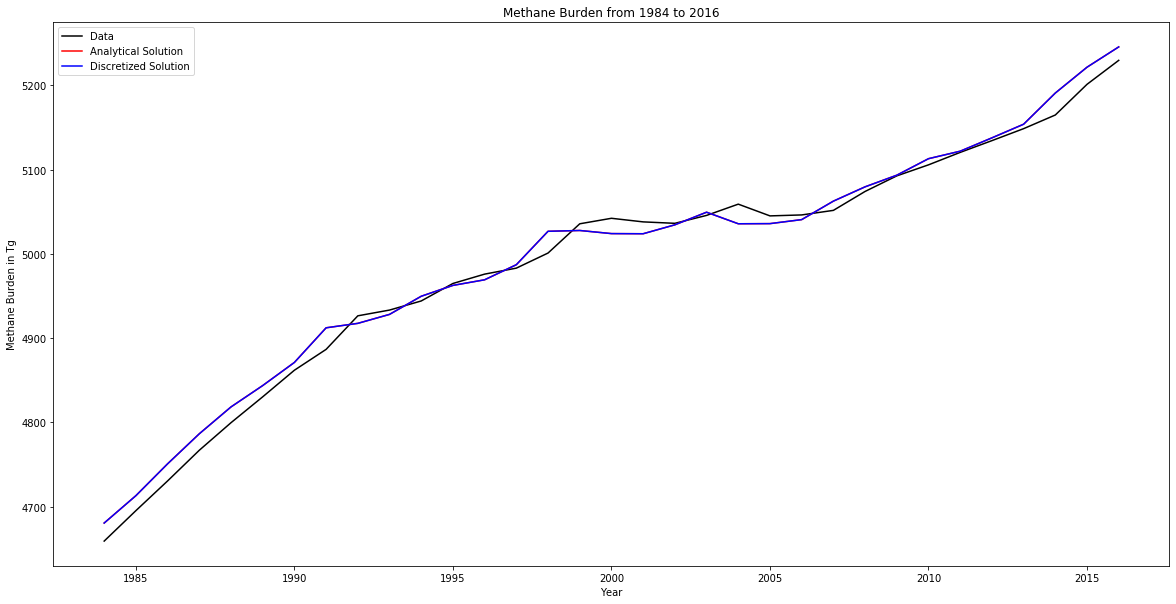

In [17]:
# plotting the data
pyplot.plot(year,converted_burden,color='black') 
pyplot.xlabel("Year")
pyplot.ylabel("Methane Burden in Tg")
pyplot.title("Methane Burden from 1984 to 2016")
pyplot.rcParams['figure.figsize']=(20,10)

#plotting the analytical solution

# chemical lifetime in years
tau=9.4   
# initial ch4 burden (total atm. mass) Tg
ch4i=4659
# q (not time dependent) Tg/yr
q=518.4
# starting year (time step=1 year)
yr1=1984.
#number of years
nyrs=33

def analytical_burden(t,tau,q,ch4i):
    ch4f=ch4i*math.exp(-t/tau)+tau*q*(1.-math.exp(-t/tau))
    return ch4f

q=numpy.zeros(nyrs)
for i in range(nyrs):
    q[i]=qdata[i]

ch4i=numpy.zeros(nyrs)
for i in range(nyrs):
    ch4i[i]=burden[i]

ch4f=numpy.zeros(nyrs)
for i in range(nyrs):
  t=1
  x=analytical_burden(t,tau,q[i],ch4i[i])
  ch4f[i]=x

pyplot.plot(year,ch4f,color='red') 
pyplot.legend(['Analytical Solution'])

#plotting the discretized solution

def discretized_burden(t,tau,q,ch4i):
    ch4fd=ch4i+(q-ch4i/tau)
    return ch4fd

ch4fd=numpy.zeros(nyrs)
for i in range(nyrs):
  t=1
  x=analytical_burden(t,tau,q[i],ch4i[i])
  ch4fd[i]=x

pyplot.plot(year,ch4fd,color='blue') 

pyplot.legend(['Data','Analytical Solution','Discretized Solution'])


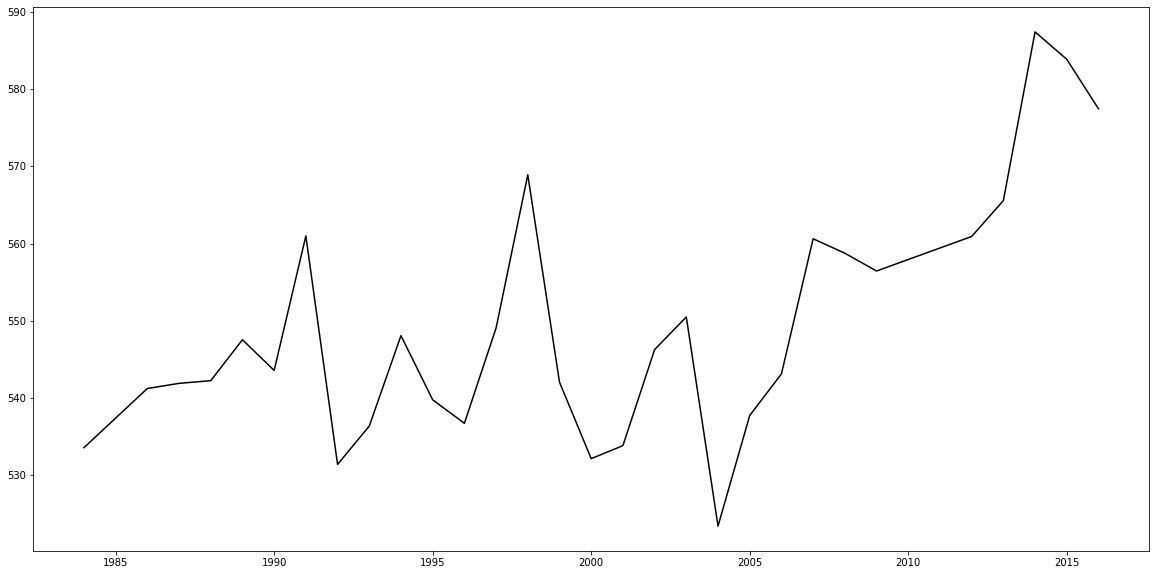

In [228]:
#plotting q values

# chemical lifetime in years
tau=9.4   
# starting year (time step=1 year)
yr1=1984.
#number of years
nyrs=33

def q_values(t,tau,ch4i,ch4f):
    q=(ch4f-ch4i*math.exp(-t/tau))/(tau*(1.-math.exp(-t/tau)))
    return q

ch4f=numpy.zeros(nyrs)
for i in range(nyrs):
    ch4f[i]=ch4f_data[i]

ch4i=numpy.zeros(nyrs)
for i in range(nyrs):
    ch4i[i]=burden[i]

q=numpy.zeros(nyrs)
for i in range (nyrs):
    t=1
    x=q_values(t,tau,ch4i[i],ch4f[i])
    q[i]=x
    

pyplot.plot(year,q,color='black') 

